In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('./london_weather.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

#get mean monthly temp
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df=df.groupby('month_year').mean()



# #df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

# 
# df=df.groupby(np.arange(len(df.index))//30).mean()

# # #df['date'].dt.to_period('M')

# df.sort_values(by='date', inplace = True)
# df.reset_index(drop=True, inplace=True)
# df.columns = ['ds','y']
# df.set_index('ds', inplace= True)








# im=pd.data_range('1979-01','2020-12',freq='MS').strftime("%Y-%m").tolist()

# #df.drop('Month',axis=1,inplace=True)
# #df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
# #df.columns = ['ds','y']
# #df=df.drop('ds', axis=1)

# #df.set_index('ds', inplace= True)

# # df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')


# # df.sort_values(by='date', inplace = True)
# # df.reset_index(drop=True, inplace=True)

# # df.columns = ['ds','y']
# # df.set_index('ds', inplace= True)


df




,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,month,year
month_year,,,,,,,,,,
1979-01,5.724138,2.017241,29.965517,4.144828,0.527586,-2.641379,2.058621,101120.689655,1.0,1979.0
1979-02,6.360000,1.948000,45.440000,4.428000,2.028000,-0.348000,1.744000,101061.600000,2.0,1979.0
1979-03,5.967742,3.212903,93.354839,9.238710,5.587097,1.993548,3.061290,100459.032258,3.0,1979.0
1979-04,6.133333,3.543333,134.166667,12.520000,8.743333,4.810000,2.586667,101165.333333,4.0,1979.0
1979-05,5.290323,6.470968,204.064516,16.206452,11.490323,7.151613,2.806452,101362.580645,5.0,1979.0
...,...,...,...,...,...,...,...,...,...,...
2020-08,5.066667,5.976667,208.100000,25.200000,20.393333,15.640000,1.873333,101219.333333,8.0,2020.0
2020-09,4.200000,6.540000,170.000000,21.693333,16.616667,11.580000,0.640000,101695.000000,9.0,2020.0
2020-10,5.733333,1.780000,70.533333,14.970000,11.933333,8.933333,4.773333,100794.333333,10.0,2020.0


In [12]:
type(df)
df[['precipitation','sunshine']]

,precipitation,sunshine
0,2.326667,1.950000
1,1.393333,2.466667
2,3.083333,2.943333
3,2.923333,4.273333
4,2.430000,5.980000
...,...,...
504,1.960000,4.656667
505,3.200000,5.740000
506,2.653333,2.093333
507,1.826667,1.230000


In [ ]:
# https://stackoverflow.com/questions/57080071/arima-model-producing-a-straight-line-prediction
# Visualize seasonal decomposition

In [4]:
#find d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if p<0.05, stationary, no differencing required, 
# d=0


AttributeError: 'DataFrame' object has no attribute 'y'

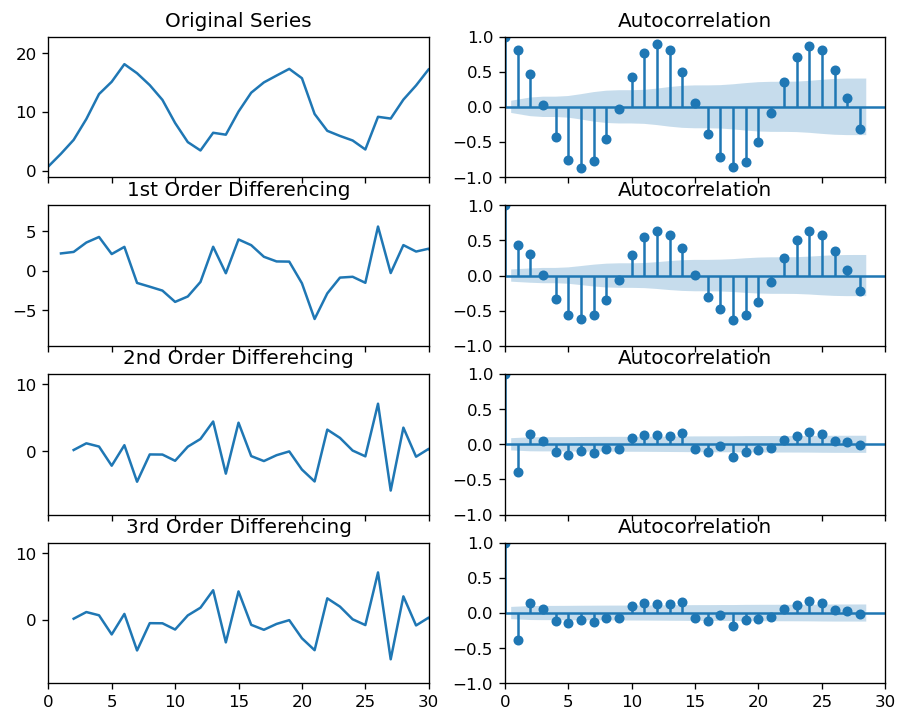

In [30]:
"""# find d if not stationery
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.y); axes[0, 0].set_title('Original Series')
plot_acf(df.y, ax=axes[0, 1])
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
"""

AttributeError: 'DataFrame' object has no attribute 'y'

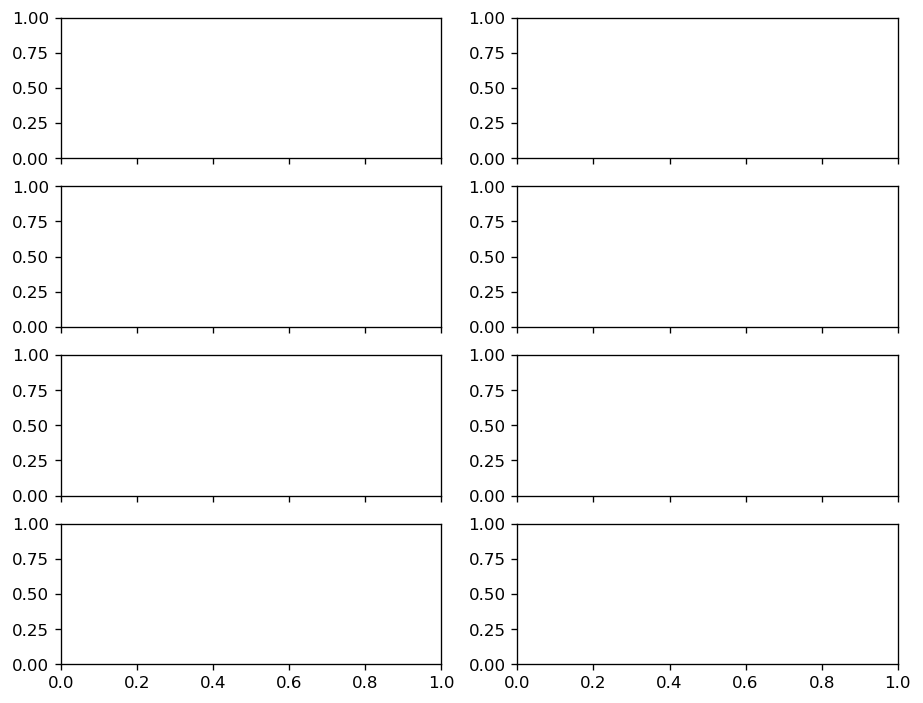

In [77]:
# find p
# PACF plot of Non-differenced series
"""plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.y); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.y.dropna(), ax=axes[1])
plt.xlim(0, 40)##################
plt.show()"""


import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.y); axes[0, 0].set_title('Original Series')
plot_pacf(df.y.dropna(), ax=axes[0, 1])# dropna () removes the rows that contains NULL values
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df.y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()



"""from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

PACFplot=df.reset_index(drop = True)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

plot_pacf(PACFplot.y.diff().dropna(), lags=40, ax=axes[1])
plt.xlim(0, 20)##################
plt.ylim(-0.25, 0.250)##################
plt.show()"""


In [65]:
# # find q
# import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.y); axes[0].set_title('No Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(df.y.dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()

# #simply assume q=2

# """import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# PACFplot=df.reset_index(drop = True)

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(PACFplot.y.diff().dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()"""

# test 1 

In [47]:
# Split data into train / test sets = 8:2
train = df.iloc[:len(df)-100]#404 elements until 2012-08
test = df.iloc[len(df)-100:]#100 elements from 2012-09 to 2020-12


In [49]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(y=df['mean_temp'], X=df[['min_temp']],
                          start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1002.078, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=861.710, Time=1.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1000.137, Time=0.38 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=991.552, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=810.229, Time=2.66 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.57 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=832.625, Time=18.17 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=812.139, Time=2.72 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=812.135, Time=3.39 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=811.944, Time=2.04 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=8.82 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=808.631

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  504
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -399.315
Date:                            Mon, 03 Apr 2023   AIC                            808.631
Time:                                    21:15:41   BIC                            829.623
Sample:                                01-31-1979   HQIC                           816.874
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
min_temp       0.9806      0.016     59.762      0.000       0.948       1.013
ar.L1          0.2294      0.045      5.110      0.000       0.141       0.317
ar.S.L12      -0.6565      0.043    -15.207      0.000      -0.741      -0.572
ar.S.L24      -0.3307      0.046     -7.132      0.000      -0.422      -0.240
sigma2         0.2931      0.020     14.980      0.000       0.255       0.331
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.93   Prob(JB):                         0.40
Heteroskedasticity (H):               1.02   Skew:                             0.14
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
#build up ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


#'precipitation','sunshine', (0, 3),(1, 2, 12) VARMA
model = sm.tsa.VARMAX(endog = train[['mean_temp', 'min_temp']],
                order = (1, 0), 
                seasonal_order =(2, 1, 0, 12))
                #order = (2, 2), 
                #seasonal_order =(0, 1, 1, 12))

result = model.fit()
result.summary()

Dep. Variable:,"['mean_temp', 'min_temp']",No. Observations:,404
Model:,VAR(1),Log Likelihood,-1243.502
,+ intercept,AIC,2505.003
Date:,"Mon, 03 Apr 2023",BIC,2541.016
Time:,21:47:29,HQIC,2519.259
Sample:,01-31-1979,,
,- 08-31-2012,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"28.58, 4.17",Jarque-Bera (JB):,"3.63, 1.64"
Prob(Q):,"0.00, 0.04",Prob(JB):,"0.16, 0.44"
Heteroskedasticity (H):,"0.81, 0.99",Skew:,"-0.14, -0.15"


# testing 1

In [88]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1 
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, dynamic = True)
predictions.index=test.index

# plot predictions and actual values
#predictions.plot(legend = True)
#test['y'].plot(legend = True)


predictions


,mean_temp,min_temp
month_year,,
2012-09,16.935467,12.577835
2012-10,15.222051,11.050719
2012-11,13.916478,9.861893
2012-12,12.986824,9.003996
2013-01,12.354258,8.414760
...,...,...
2020-08,11.253606,7.374116
2020-09,11.253606,7.374116
2020-10,11.253606,7.374116


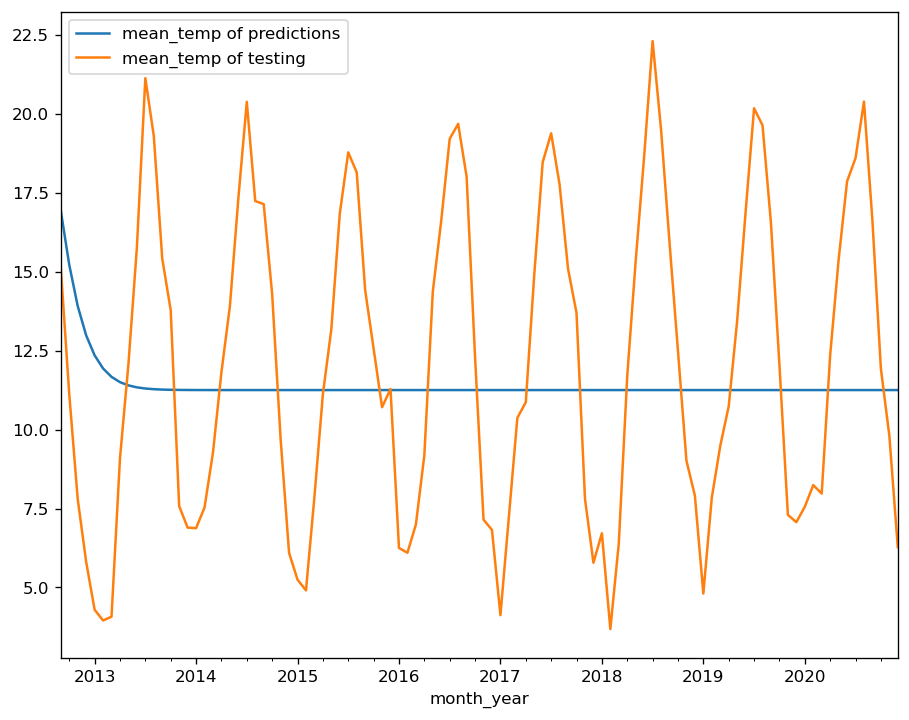

In [89]:
# plot predictions and actual values
predictions['mean_temp'].plot(legend = True)
test['mean_temp'].plot(legend = True)
plt.legend(["mean_temp of predictions", "mean_temp of testing"]);

In [92]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["mean_temp"], predictions["mean_temp"])
  
# Calculate mean squared error
MSE=mean_squared_error(test["mean_temp"], predictions["mean_temp"])

In [93]:
MSE

26.823680696739242

In [94]:
RMSE

5.179158300027066

# forecasting 

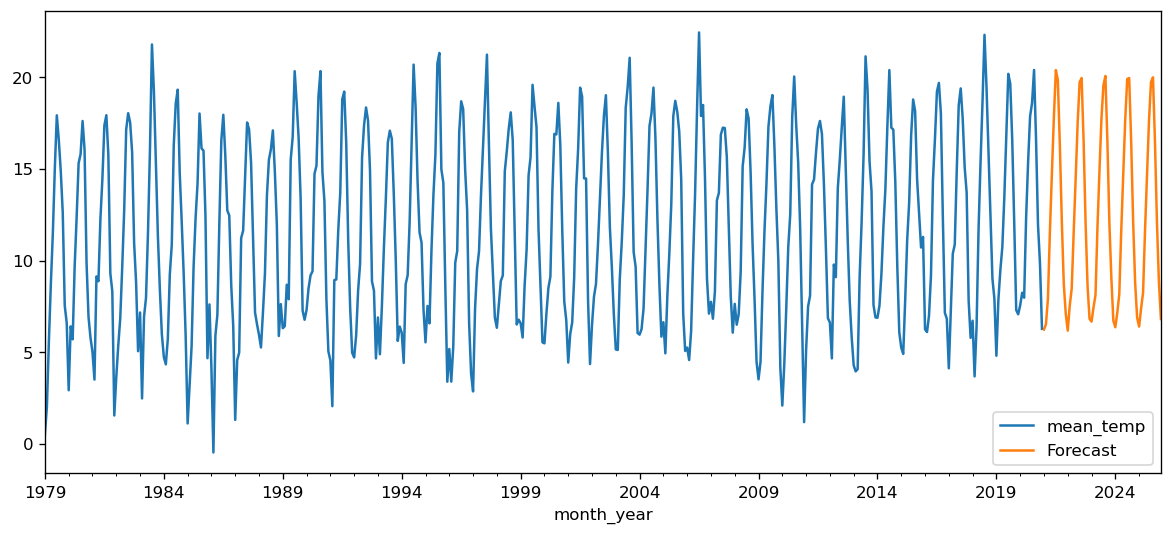

In [91]:
#Forecast using ARIMA Model
#forecasting 5 year


# Train the model on the full dataset; (2, 0, 2)(0, 1, 1, 12)
model = ARIMA(df['mean_temp'], 
                              order = (1, 0,0), 
                seasonal_order =(2, 1, 0, 12))
                #order = (2, 0, 2), #
                #seasonal_order =(0, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 1 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 60, 
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
df['mean_temp'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

forecast.to_csv('forecast_multi.csv', header=True, index=False, encoding='utf-8')

In [57]:
forecast

2021-01     5.983295
2021-02     6.240585
2021-03     8.468280
2021-04    10.962390
2021-05    14.263484
2021-06    17.295858
2021-07    19.649346
2021-08    19.302677
2021-09    16.581509
2021-10    12.979297
2021-11     8.980460
2021-12     6.757115
2022-01     6.037929
2022-02     6.262289
2022-03     8.475202
2022-04    10.962675
2022-05    14.260792
2022-06    17.291831
2022-07    19.644722
2022-08    19.297786
2022-09    16.576500
2022-10    12.974237
2022-11     8.975378
2022-12     6.752026
2023-01     6.032837
2023-02     6.257198
2023-03     8.470113
2023-04    10.957590
2023-05    14.255709
2023-06    17.286751
2023-07    19.639645
2023-08    19.292712
2023-09    16.571429
2023-10    12.969169
2023-11     8.970313
2023-12     6.746964
2024-01     6.027779
2024-02     6.252143
2024-03     8.465060
2024-04    10.952540
2024-05    14.250662
2024-06    17.281707
2024-07    19.634604
2024-08    19.287674
2024-09    16.566394
2024-10    12.964137
2024-11     8.965284
2024-12     6